Epoch 1/3500
1/1 [==============================] - ETA: 0s - loss: 0.2565 - accuracy: 0.5344
Epoch 1: val_loss improved from inf to 0.28123, saving model to ./model/01-0.2812.hdf5
1/1 [==============================] - 3s 3s/step - loss: 0.2565 - accuracy: 0.5344 - val_loss: 0.2812 - val_accuracy: 0.0000e+00
Epoch 2/3500
1/1 [==============================] - ETA: 0s - loss: 0.2547 - accuracy: 0.5450
Epoch 2: val_loss improved from 0.28123 to 0.27396, saving model to ./model/02-0.2740.hdf5
1/1 [==============================] - 0s 53ms/step - loss: 0.2547 - accuracy: 0.5450 - val_loss: 0.2740 - val_accuracy: 0.0000e+00
Epoch 3/3500
1/1 [==============================] - ETA: 0s - loss: 0.2534 - accuracy: 0.5132
Epoch 3: val_loss improved from 0.27396 to 0.26753, saving model to ./model/03-0.2675.hdf5
1/1 [==============================] - 0s 52ms/step - loss: 0.2534 - accuracy: 0.5132 - val_loss: 0.2675 - val_accuracy: 0.1053
Epoch 4/3500
1/1 [==============================] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 349/3500
1/1 [==============================] - ETA: 0s - loss: 0.0483 - accuracy: 0.9683
Epoch 349: val_loss did not improve from 0.09623
1/1 [==============================] - 0s 69ms/step - loss: 0.0483 - accuracy: 0.9683 - val_loss: 0.0965 - val_accuracy: 0.9474
Epoch 350/3500
1/1 [==============================] - ETA: 0s - loss: 0.0481 - accuracy: 0.9683
Epoch 350: val_loss did not improve from 0.09623
1/1 [==============================] - 0s 58ms/step - loss: 0.0481 - accuracy: 0.9683 - val_loss: 0.0981 - val_accuracy: 0.8947
Epoch 351/3500
1/1 [==============================] - ETA: 0s - loss: 0.0479 - accuracy: 0.9683
Epoch 351: val_loss did not improve from 0.09623
1/1 [==============================] - 0s 58ms/step - loss: 0.0479 - accuracy: 0.9683 - val_loss: 0.0973 - val_accuracy: 0.8947
Epoch 352/3500
1/1 [==============================] - ETA: 0s - loss: 0.0477 - accuracy: 0.9683
Epoch 352: val_loss improved from 0.09623 to 0.09

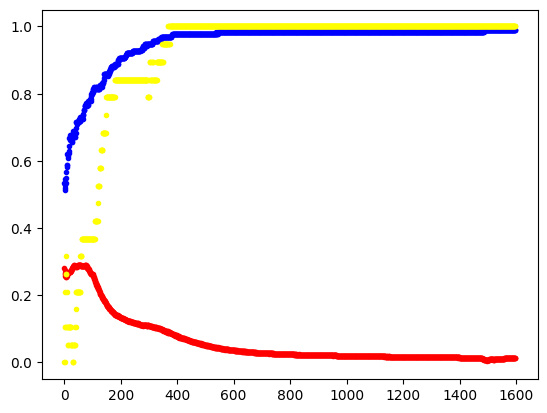

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy
import tensorflow as tf
import os
import matplotlib.pyplot as plt

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

df = pd.read_csv('/content/drive/MyDrive/24-1 인공지능/080228-master/deeplearning/dataset/sonar.csv', header=None)
dataset = df.values
X = dataset[:,0:60].astype(float)
Y_obj = dataset[:,60]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

# 학습 셋과 테스트 셋의 구분
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['accuracy'])

# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"

# 모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

#  모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.09, epochs=3500, batch_size=500, verbose=1, callbacks=[early_stopping_callback, checkpointer])

# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

# y_acc 에 학습 셋으로 측정한 정확도의 값을 저장
y_acc=history.history['accuracy']

# y_vaccuracy에 테스트셋으로 실험 결과의 오차 값을 저장
y_vaccuracy=history.history['val_accuracy']

# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)
plt.plot(x_len, y_vaccuracy, "o", c="yellow", markersize=3)

plt.show()
